In [1]:
#importing libraries and reading the training data file
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
df=pd.read_csv(r'C:\Users\Niketa Mittal\Downloads\credit-card-data.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [2]:
#checking the type of variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [3]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [3]:
#imputing null values with median
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median(),inplace=True)
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(),inplace=True)

In [4]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [5]:
#calculating KPIs: Monthly Average Purchase and Cash Advance Amount
df['Mnthly_avg_purchase']=df['PURCHASES']/df['TENURE']
df['Cash_adv_amount']=df['CASH_ADVANCE']/df['TENURE']
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Mnthly_avg_purchase,Cash_adv_amount
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,7.950000,0.000000
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0.000000,536.912124
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,64.430833,0.000000
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,124.916667,17.149001
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1.333333,0.000000


In [6]:
#declaring function to find type of purchase
def purchaseType(data):
    if((data.ONEOFF_PURCHASES==0)&(data.INSTALLMENTS_PURCHASES==0)):
        return 'None'
    if((data.ONEOFF_PURCHASES>0)&(data.INSTALLMENTS_PURCHASES==0)):
        return 'One-off'
    if((data.ONEOFF_PURCHASES==0)&(data.INSTALLMENTS_PURCHASES>0)):
        return 'Installments'
    if((data.ONEOFF_PURCHASES>0)&(data.INSTALLMENTS_PURCHASES>0)):
        return 'Both'

In [7]:
#adding purchase type column to dataframe
df['Purchase_Type']=df.apply(purchaseType,axis=1)

In [8]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Mnthly_avg_purchase,Cash_adv_amount,Purchase_Type
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,...,0,2,1000.0,201.802084,139.509787,0.000000,12,7.950000,0.000000,Installments
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,...,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0.000000,536.912124,None
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,...,0,12,7500.0,622.066742,627.284787,0.000000,12,64.430833,0.000000,One-off
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,...,1,1,7500.0,0.000000,312.343947,0.000000,12,124.916667,17.149001,One-off
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,...,0,1,1200.0,678.334763,244.791237,0.000000,12,1.333333,0.000000,One-off


In [9]:
#calculating KPI: Limit Usage
df['Limit_Usage']=df['BALANCE']/df['CREDIT_LIMIT']
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Mnthly_avg_purchase,Cash_adv_amount,Purchase_Type,Limit_Usage
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,...,2,1000.0,201.802084,139.509787,0.000000,12,7.950000,0.000000,Installments,0.040901
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,...,0,7000.0,4103.032597,1072.340217,0.222222,12,0.000000,536.912124,None,0.457495
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,...,12,7500.0,622.066742,627.284787,0.000000,12,64.430833,0.000000,One-off,0.332687
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,...,1,7500.0,0.000000,312.343947,0.000000,12,124.916667,17.149001,One-off,0.222223
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,...,1,1200.0,678.334763,244.791237,0.000000,12,1.333333,0.000000,One-off,0.681429


In [10]:
#calculating KPI: Payment:Minimum Payment ratio
df['pay_minpay_ratio']=df['PAYMENTS']/df['MINIMUM_PAYMENTS']
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Mnthly_avg_purchase,Cash_adv_amount,Purchase_Type,Limit_Usage,pay_minpay_ratio
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,...,1000.0,201.802084,139.509787,0.000000,12,7.950000,0.000000,Installments,0.040901,1.446508
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,...,7000.0,4103.032597,1072.340217,0.222222,12,0.000000,536.912124,None,0.457495,3.826241
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,...,7500.0,622.066742,627.284787,0.000000,12,64.430833,0.000000,One-off,0.332687,0.991682
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,...,7500.0,0.000000,312.343947,0.000000,12,124.916667,17.149001,One-off,0.222223,0.000000
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,...,1200.0,678.334763,244.791237,0.000000,12,1.333333,0.000000,One-off,0.681429,2.771075


In [11]:
#dropping columns from which KPIs have been calculated
df.drop(['CUST_ID','PURCHASES','CASH_ADVANCE','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','BALANCE','CREDIT_LIMIT','PAYMENTS','MINIMUM_PAYMENTS'],axis=1,inplace=True)
df.head()

,BALANCE_FREQUENCY,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,PRC_FULL_PAYMENT,TENURE,Mnthly_avg_purchase,Cash_adv_amount,Purchase_Type,Limit_Usage,pay_minpay_ratio
0,0.818182,0.166667,0.000000,0.083333,0.000000,0,2,0.000000,12,7.950000,0.000000,Installments,0.040901,1.446508
1,0.909091,0.000000,0.000000,0.000000,0.250000,4,0,0.222222,12,0.000000,536.912124,None,0.457495,3.826241
2,1.000000,1.000000,1.000000,0.000000,0.000000,0,12,0.000000,12,64.430833,0.000000,One-off,0.332687,0.991682
3,0.636364,0.083333,0.083333,0.000000,0.083333,1,1,0.000000,12,124.916667,17.149001,One-off,0.222223,0.000000
4,1.000000,0.083333,0.083333,0.000000,0.000000,0,1,0.000000,12,1.333333,0.000000,One-off,0.681429,2.771075


In [12]:
#checking new variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE_FREQUENCY                 8950 non-null   float64
 1   PURCHASES_FREQUENCY               8950 non-null   float64
 2   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 3   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 4   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 5   CASH_ADVANCE_TRX                  8950 non-null   int64  
 6   PURCHASES_TRX                     8950 non-null   int64  
 7   PRC_FULL_PAYMENT                  8950 non-null   float64
 8   TENURE                            8950 non-null   int64  
 9   Mnthly_avg_purchase               8950 non-null   float64
 10  Cash_adv_amount                   8950 non-null   float64
 11  Purchase_Type                     8950 non-null   object 
 12  Limit_

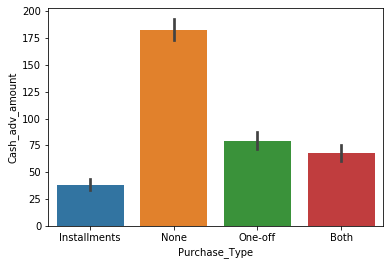

In [13]:
#plotting various KPIs as per their purchase type
sns.barplot(df['Purchase_Type'],df['Cash_adv_amount'])

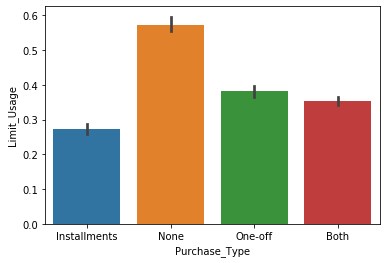

In [14]:
sns.barplot(df['Purchase_Type'],df['Limit_Usage'])

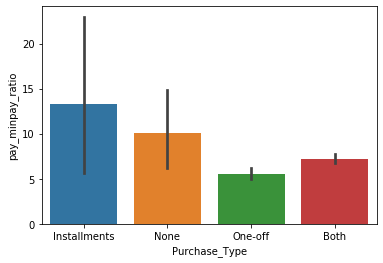

In [15]:
sns.barplot(df['Purchase_Type'],df['pay_minpay_ratio'])

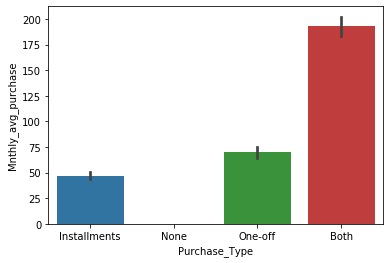

In [16]:
sns.barplot(df['Purchase_Type'],df['Mnthly_avg_purchase'])

In [17]:
#converting Purchase type variable(Object type) to numerical
le=LabelEncoder()
df['Purchase_Type']=le.fit_transform(df['Purchase_Type'])
df.head()

,BALANCE_FREQUENCY,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,PRC_FULL_PAYMENT,TENURE,Mnthly_avg_purchase,Cash_adv_amount,Purchase_Type,Limit_Usage,pay_minpay_ratio
0,0.818182,0.166667,0.000000,0.083333,0.000000,0,2,0.000000,12,7.950000,0.000000,1,0.040901,1.446508
1,0.909091,0.000000,0.000000,0.000000,0.250000,4,0,0.222222,12,0.000000,536.912124,2,0.457495,3.826241
2,1.000000,1.000000,1.000000,0.000000,0.000000,0,12,0.000000,12,64.430833,0.000000,3,0.332687,0.991682
3,0.636364,0.083333,0.083333,0.000000,0.083333,1,1,0.000000,12,124.916667,17.149001,3,0.222223,0.000000
4,1.000000,0.083333,0.083333,0.000000,0.000000,0,1,0.000000,12,1.333333,0.000000,3,0.681429,2.771075


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE_FREQUENCY                 8950 non-null   float64
 1   PURCHASES_FREQUENCY               8950 non-null   float64
 2   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 3   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 4   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 5   CASH_ADVANCE_TRX                  8950 non-null   int64  
 6   PURCHASES_TRX                     8950 non-null   int64  
 7   PRC_FULL_PAYMENT                  8950 non-null   float64
 8   TENURE                            8950 non-null   int64  
 9   Mnthly_avg_purchase               8950 non-null   float64
 10  Cash_adv_amount                   8950 non-null   float64
 11  Purchase_Type                     8950 non-null   int32  
 12  Limit_

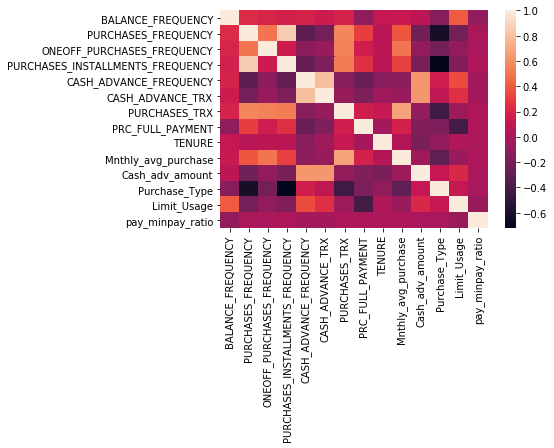

In [19]:
#mapping correlation among variables
map1=sns.heatmap(df.corr())

In [20]:
#scaling the variables in dataset
sc=StandardScaler()
df_new=sc.fit_transform(df)

In [21]:
df_new

array([[-0.24943448, -0.80649035, -0.67866081, ..., -0.29996048,
        -0.89295117, -0.06441908],
       [ 0.13432467, -1.22175806, -0.67866081, ...,  0.59017424,
         0.17606298, -0.04428153],
       [ 0.51808382,  1.26984323,  2.67345108, ...,  1.48030895,
        -0.14420619, -0.06826787],
       ...,
       [-0.18547673,  0.85457552, -0.67866081, ..., -0.29996048,
        -0.93786286, -0.06831531],
       [-0.18547673, -1.22175806, -0.67866081, ...,  0.59017424,
        -0.92883936, -0.06868401],
       [-0.88903307,  0.4393103 ,  1.55608157, ...,  1.48030895,
        -0.20090741, -0.07060546]])

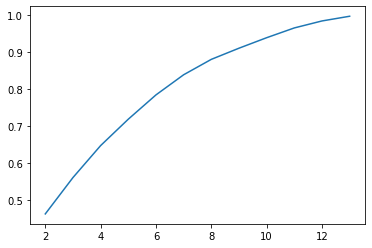

In [22]:
#trying find the best number of variables that can be used (hyperparameter)
from sklearn.decomposition import PCA
variance={}
for i in range(2,14):
    pca=PCA(n_components=i)
    df_pca=pca.fit(df_new)
    variance[i]=sum(df_pca.explained_variance_ratio_)
pd.Series(variance).plot()

In [23]:
variance

{2: 0.46146844039758816,
 3: 0.5599914449841372,
 4: 0.6466243061528939,
 5: 0.7181881593612013,
 6: 0.7839625800713269,
 7: 0.8385243041989108,
 8: 0.8802690667437937,
 9: 0.9105014640425518,
 10: 0.9389432237977025,
 11: 0.9654279001964738,
 12: 0.9843235583772179,
 13: 0.9970885414691728}

In [24]:
#reducing number of variables to 8 as they cover 88% 
final_pca=PCA(n_components=8)
df_credit=final_pca.fit_transform(df_new)

In [25]:
df_credit[0]

array([-0.57318519, -1.49137387,  0.31120109, -0.18769956,  0.10151185,
       -0.34041346, -0.5169099 , -0.17373993])

In [26]:
df_credit.shape

(8950, 8)

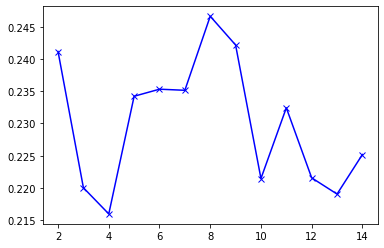

In [27]:
#Elbow method to calculate the number of clusters in which the data can be segmented (hyperparameter tuning)
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
distort=[]
r=range(2,15)
for i in r:
    KCluster=KMeans(n_clusters=i).fit(df_new)
    predicts=KCluster.fit_predict(df_new)
    sills=silhouette_score(df_new,predicts,metric='euclidean')
    distort.append(sills)
plt.plot(r,distort,'bx-')
plt.show()

In [28]:
#creating KMeans model using number of clusters as 5
km_5=KMeans(n_clusters=5)
km_5.fit(df_credit)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [29]:
km_5.labels_

array([2, 4, 0, ..., 1, 2, 4])

In [30]:
pd.Series(km_5.labels_).value_counts()

1    2830
4    2758
2    1407
0    1129
3     826
dtype: int64

In [31]:
#assigning cluster id to each data value
df_final_5=pd.concat([df,pd.Series(km_5.labels_,name='Cluster_id')],axis=1)
df_final_5.head()

,BALANCE_FREQUENCY,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,PRC_FULL_PAYMENT,TENURE,Mnthly_avg_purchase,Cash_adv_amount,Purchase_Type,Limit_Usage,pay_minpay_ratio,Cluster_id
0,0.818182,0.166667,0.000000,0.083333,0.000000,0,2,0.000000,12,7.950000,0.000000,1,0.040901,1.446508,2
1,0.909091,0.000000,0.000000,0.000000,0.250000,4,0,0.222222,12,0.000000,536.912124,2,0.457495,3.826241,4
2,1.000000,1.000000,1.000000,0.000000,0.000000,0,12,0.000000,12,64.430833,0.000000,3,0.332687,0.991682,0
3,0.636364,0.083333,0.083333,0.000000,0.083333,1,1,0.000000,12,124.916667,17.149001,3,0.222223,0.000000,2
4,1.000000,0.083333,0.083333,0.000000,0.000000,0,1,0.000000,12,1.333333,0.000000,3,0.681429,2.771075,4


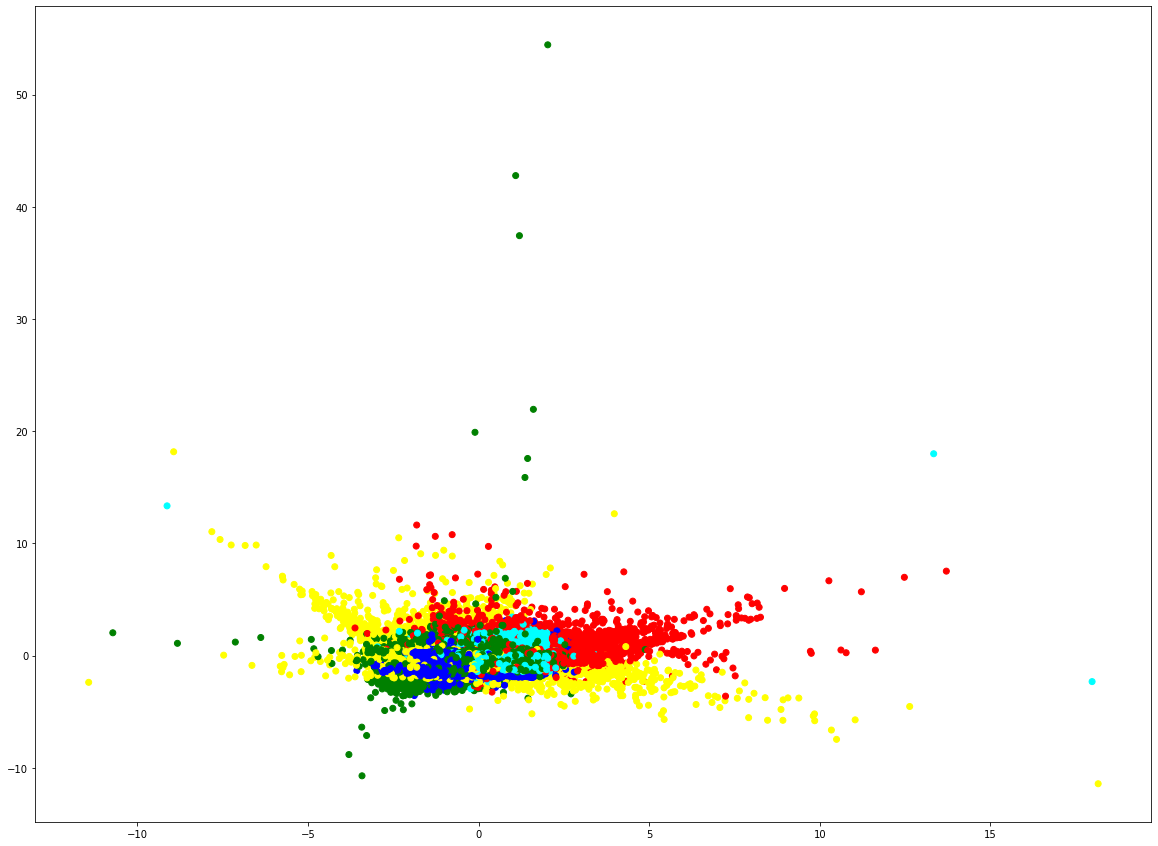

In [32]:
#plotting the data points as per their cluster (colour coding)
color_map={0:'red', 1:'blue', 2:'green', 3:'yellow', 4:'cyan'}
label_color = [color_map[l] for l in km_5.labels_]
plt.figure(figsize=(20,15))
plt.scatter(df_credit[:,0],df_credit[:,1],c=label_color)
plt.scatter(df_credit[:,1],df_credit[:,2],c=label_color)
plt.scatter(df_credit[:,2],df_credit[:,3],c=label_color)
plt.scatter(df_credit[:,3],df_credit[:,4],c=label_color)
#plt.scatter(df_credit[:,0],df_credit[:,1],c=label_color)

In [33]:
#defining characteristic values of each variable as per cluster
df_final_5.groupby('Cluster_id').apply(lambda x: x[df.columns].mean())

,BALANCE_FREQUENCY,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,PRC_FULL_PAYMENT,TENURE,Mnthly_avg_purchase,Cash_adv_amount,Purchase_Type,Limit_Usage,pay_minpay_ratio
Cluster_id,,,,,,,,,,,,,,
0,0.983511,0.953704,0.805057,0.624706,0.052494,1.080602,55.315323,0.327525,11.864482,346.827503,27.866483,0.510186,0.265868,11.154745
1,0.953201,0.820806,0.125712,0.739835,0.049596,0.993640,17.372792,0.211679,11.585159,79.833945,25.558579,0.507774,0.327368,4.472308
2,0.402158,0.261321,0.083872,0.166967,0.039278,0.756930,4.046908,0.225356,11.299929,33.170690,33.422465,1.794598,0.043942,31.854087
3,0.952960,0.305646,0.156515,0.195375,0.585006,18.171913,8.832930,0.043821,10.832930,55.701106,489.231621,1.571429,0.597823,5.139279
4,0.975580,0.133750,0.108786,0.024070,0.170935,3.252357,2.555112,0.019452,11.621465,22.149822,87.538140,2.222625,0.615759,2.453022


In [34]:
#creating KMeans model having 4 clusters
km_4=KMeans(n_clusters=4)
km_4.fit(df_credit)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [35]:
km_4.labels_

array([1, 1, 0, ..., 2, 1, 1])

In [36]:
pd.Series(km_4.labels_).value_counts()

1    3495
2    3201
0    1215
3    1039
dtype: int64

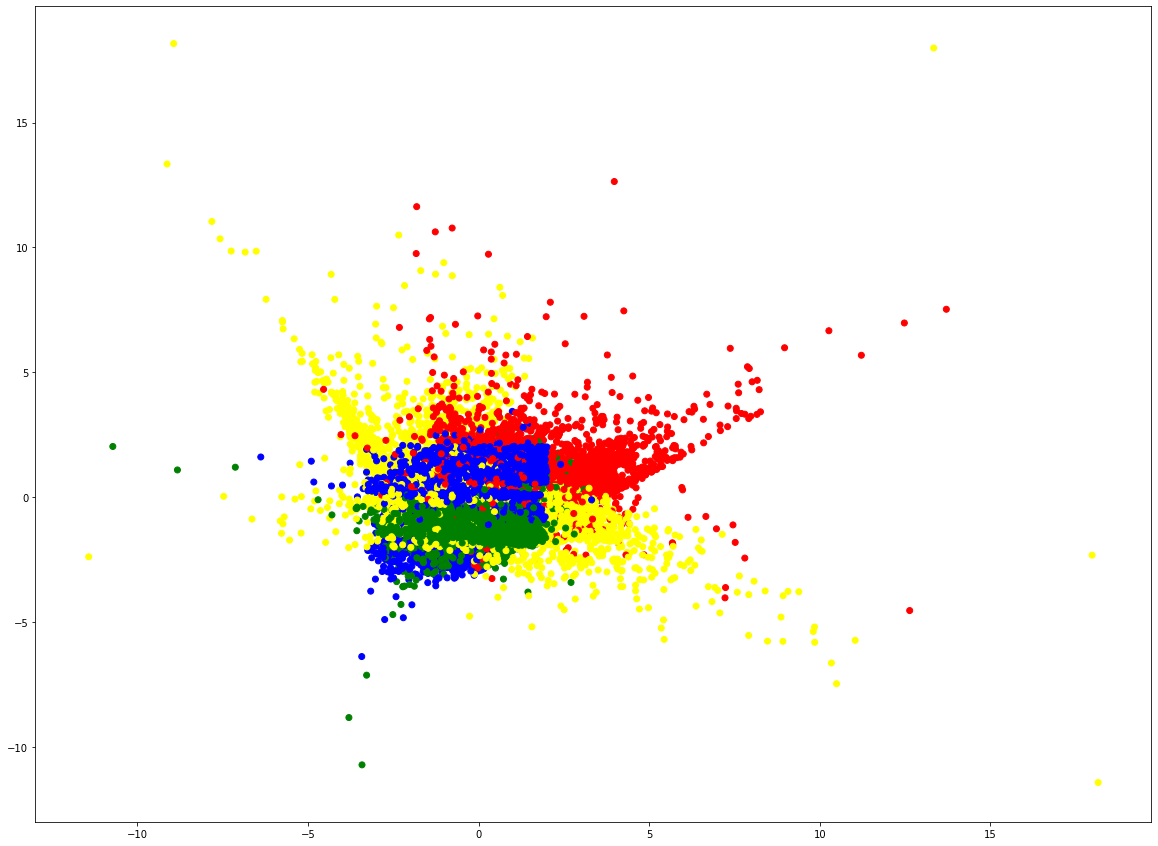

In [37]:
#plotting the data values as per cluster (colour coding)
color_map={0:'red', 1:'blue', 2:'green', 3:'yellow'}
label_color = [color_map[l] for l in km_4.labels_]
plt.figure(figsize=(20,15))
plt.scatter(df_credit[:,0],df_credit[:,1],c=label_color)
plt.scatter(df_credit[:,1],df_credit[:,2],c=label_color)
plt.scatter(df_credit[:,2],df_credit[:,3],c=label_color)
#plt.scatter(df_credit[:,3],df_credit[:,4],c=label_color)
#plt.scatter(df_credit[:,0],df_credit[:,1],c=label_color)

In [38]:
#assigning cluster id to each data value
df_final_4=pd.concat([df,pd.Series(km_4.labels_,name='Cluster_id')],axis=1)
df_final_4.head()

,BALANCE_FREQUENCY,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,PRC_FULL_PAYMENT,TENURE,Mnthly_avg_purchase,Cash_adv_amount,Purchase_Type,Limit_Usage,pay_minpay_ratio,Cluster_id
0,0.818182,0.166667,0.000000,0.083333,0.000000,0,2,0.000000,12,7.950000,0.000000,1,0.040901,1.446508,1
1,0.909091,0.000000,0.000000,0.000000,0.250000,4,0,0.222222,12,0.000000,536.912124,2,0.457495,3.826241,1
2,1.000000,1.000000,1.000000,0.000000,0.000000,0,12,0.000000,12,64.430833,0.000000,3,0.332687,0.991682,0
3,0.636364,0.083333,0.083333,0.000000,0.083333,1,1,0.000000,12,124.916667,17.149001,3,0.222223,0.000000,1
4,1.000000,0.083333,0.083333,0.000000,0.000000,0,1,0.000000,12,1.333333,0.000000,3,0.681429,2.771075,1


In [39]:
#defining characteristic values of each variable as per cluster
df_final_4.groupby('Cluster_id').apply(lambda x: x[df.columns].mean())

,BALANCE_FREQUENCY,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,PRC_FULL_PAYMENT,TENURE,Mnthly_avg_purchase,Cash_adv_amount,Purchase_Type,Limit_Usage,pay_minpay_ratio
Cluster_id,,,,,,,,,,,,,,
0,0.982883,0.950914,0.787873,0.626736,0.060121,1.292181,54.150617,0.308089,11.864198,339.192811,33.601892,0.504527,0.284300,10.815015
1,0.808259,0.133656,0.106792,0.024740,0.123395,2.255508,2.463233,0.059431,11.506152,24.130527,68.480331,2.257225,0.442741,7.947201
2,0.885954,0.777006,0.106323,0.700151,0.042192,0.826617,15.643236,0.235100,11.577007,71.561236,21.082278,0.547954,0.288474,11.077975
3,0.959161,0.268484,0.135853,0.166101,0.548769,16.340712,6.907603,0.039607,10.965351,44.027742,431.860952,1.645813,0.639365,4.526669


In [40]:
#creating KMeans model with 8 clusters
km_8=KMeans(n_clusters=8)
km_8.fit(df_credit)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [41]:
km_8.labels_

array([2, 3, 5, ..., 7, 7, 7])

In [42]:
pd.Series(km_8.labels_).value_counts()

3    2569
5    2388
2    1204
1    1072
0     699
7     563
4     450
6       5
dtype: int64

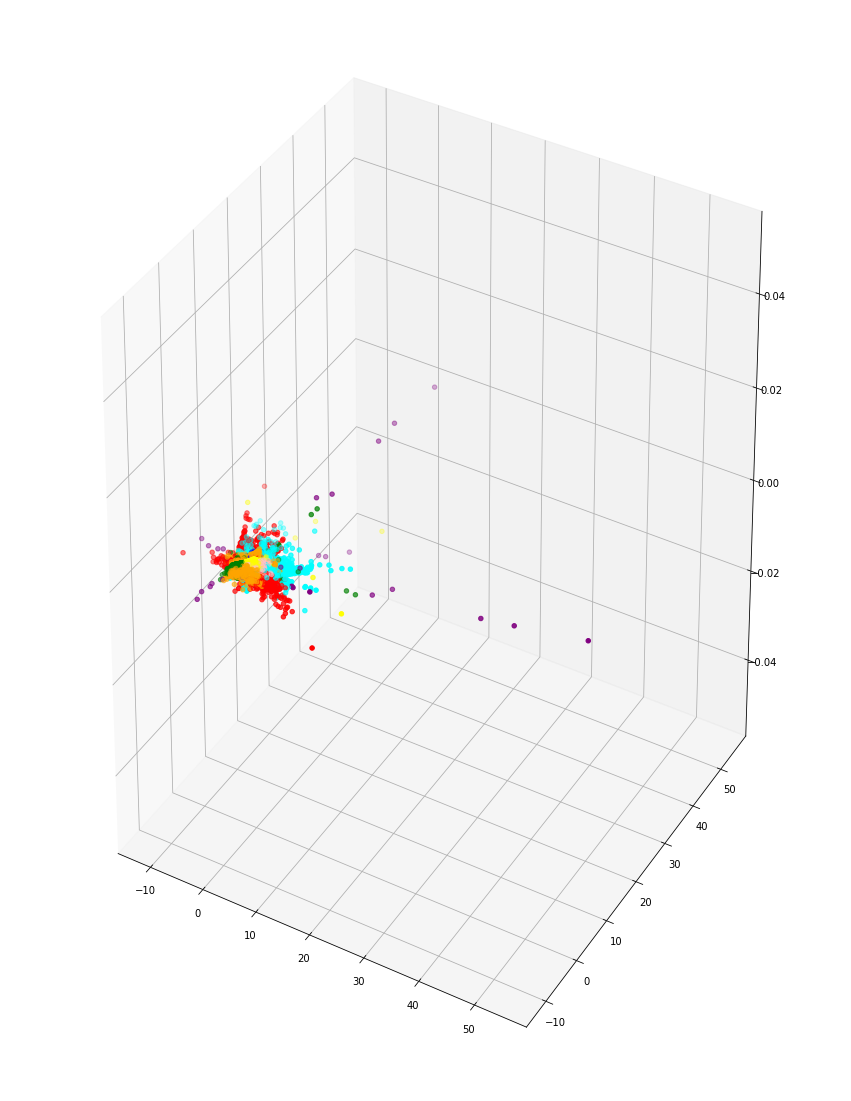

In [43]:
#plotting the data values as per cluster (tried 3D plot)
from mpl_toolkits import mplot3d
color_map={0:'red', 1:'blue', 2:'green', 3:'yellow', 4:'cyan', 5:'pink', 6:'purple', 7:'orange'}
label_color = [color_map[l] for l in km_8.labels_]
plt.figure(figsize=(15,20))
ax=plt.axes(projection='3d')
ax.scatter3D(df_credit[:,0],df_credit[:,1],c=label_color)
ax.scatter3D(df_credit[:,1],df_credit[:,2],c=label_color)
ax.scatter3D(df_credit[:,2],df_credit[:,3],c=label_color)
ax.scatter3D(df_credit[:,3],df_credit[:,4],c=label_color)
ax.scatter3D(df_credit[:,4],df_credit[:,5],c=label_color)
ax.scatter3D(df_credit[:,5],df_credit[:,6],c=label_color)
ax.scatter3D(df_credit[:,6],df_credit[:,7],c=label_color)
#plt.legend(label_color,loc='best')

In [44]:
#assigning cluster id to each data value
df_final_8=pd.concat([df,pd.Series(km_8.labels_,name='Cluster_id')],axis=1)
df_final_8.head()

,BALANCE_FREQUENCY,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,PRC_FULL_PAYMENT,TENURE,Mnthly_avg_purchase,Cash_adv_amount,Purchase_Type,Limit_Usage,pay_minpay_ratio,Cluster_id
0,0.818182,0.166667,0.000000,0.083333,0.000000,0,2,0.000000,12,7.950000,0.000000,1,0.040901,1.446508,2
1,0.909091,0.000000,0.000000,0.000000,0.250000,4,0,0.222222,12,0.000000,536.912124,2,0.457495,3.826241,3
2,1.000000,1.000000,1.000000,0.000000,0.000000,0,12,0.000000,12,64.430833,0.000000,3,0.332687,0.991682,5
3,0.636364,0.083333,0.083333,0.000000,0.083333,1,1,0.000000,12,124.916667,17.149001,3,0.222223,0.000000,2
4,1.000000,0.083333,0.083333,0.000000,0.000000,0,1,0.000000,12,1.333333,0.000000,3,0.681429,2.771075,3


In [45]:
#defining characteristic values of each variable as per cluster
df_final_8.groupby('Cluster_id').apply(lambda x: x[df.columns].mean())

,BALANCE_FREQUENCY,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,PRC_FULL_PAYMENT,TENURE,Mnthly_avg_purchase,Cash_adv_amount,Purchase_Type,Limit_Usage,pay_minpay_ratio
Cluster_id,,,,,,,,,,,,,,
0,0.968789,0.298210,0.156255,0.190055,0.607147,19.785408,8.525036,0.044893,11.394850,52.019469,493.069324,1.587983,0.603186,5.513185
1,0.914920,0.864241,0.301105,0.664939,0.006298,0.116604,20.267724,0.745932,11.744403,114.263411,3.115768,0.837687,0.040239,8.761110
2,0.385028,0.249944,0.071011,0.171499,0.035001,0.743355,3.905316,0.178075,11.781561,28.150161,31.970040,1.772425,0.041831,16.597007
3,0.980215,0.131662,0.109435,0.020913,0.170167,3.292721,2.572596,0.019544,11.871156,21.560843,84.252273,2.259245,0.615121,2.490475
4,0.991104,0.971626,0.786949,0.829179,0.065311,1.595556,90.768889,0.242954,11.926667,583.685261,44.012848,0.128889,0.366590,13.010292
5,0.973247,0.813762,0.247395,0.682034,0.069443,1.422111,20.489112,0.037708,11.898241,95.536894,34.253464,0.423786,0.426696,4.231012
6,0.279545,0.666667,0.000000,0.666667,0.025000,0.200000,15.400000,0.000000,11.200000,49.621000,2.610948,1.200000,0.000194,4446.350295
7,0.782133,0.409804,0.121577,0.267641,0.184277,2.936057,4.982238,0.143409,7.117229,56.988701,163.064418,1.676732,0.357404,5.795787
